## Install nltk

In [1]:
import nltk
#nltk.download()

In [2]:
#dir(nltk)

In [3]:
from nltk.corpus import stopwords
stopwords.words('English')[0:500:25]

['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']

## Import data in 2 ways

In [4]:
rawData = open('python_data/SMSSpamCollection.tsv').read()
rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [5]:
parsedData = rawData.replace('\t', '\n').split('\n')
parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [6]:
labelList = parsedData[0::2]
textList = parsedData[1::2]
print(labelList[0:5])
print(textList[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


In [7]:
import pandas as pd

In [8]:
fullCorpus = pd.DataFrame(
{
    'lable': labelList[: -1],
    'body_list': textList
}
)

fullCorpus.head()

,lable,body_list
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [11]:
fullCorpus = pd.read_csv('python_data/SMSSpamCollection.tsv', sep = '\t', header = None)
fullCorpus.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [12]:
fullCorpus.columns = ['label', 'body_text']
fullCorpus.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


## Explore the dataset

In [13]:
print('Input dataset has {} rows and {} columns'.format(len(fullCorpus), len(fullCorpus.columns)))

Input dataset has 5568 rows and 2 columns


In [14]:
print('Out of {} rows, {} are spam and {} are ham'.format(len(fullCorpus),
                                                          len(fullCorpus[fullCorpus['label'] == 'spam']),
                                                          len(fullCorpus[fullCorpus['label'] == 'ham'])

))

Out of 5568 rows, 746 are spam and 4822 are ham


In [15]:
print('Number of null in lable: {}'.format(fullCorpus['label'].isnull().sum()))
print('Number of null in lable: {}'.format(fullCorpus['body_text'].isnull().sum()))

Number of null in lable: 0
Number of null in lable: 0


## Text pre-processing

#### 1. Remove punctuations

In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_punct(text):
    text_nonPunct = ''.join([char for char in text if char not in string.punctuation])
    return text_nonPunct
    
fullCorpus['body_text_clean'] = fullCorpus['body_text'].apply(lambda x : remove_punct(x))

fullCorpus.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


#### 2. Tokenization

In [18]:
import re

def tokenize(text):
    return re.split('\W+', text)

fullCorpus['text_body_tokenized'] = fullCorpus['body_text_clean'].apply(lambda x : tokenize(x.lower()))

fullCorpus.head()

,label,body_text,body_text_clean,text_body_tokenized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


#### 3. Remove stopwords

In [19]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    return([word for word in tokenized_list if word not in stopwords])

fullCorpus['text_body_nostop'] = fullCorpus['text_body_tokenized'].apply(lambda x : remove_stopwords(x))

fullCorpus.head()

,label,body_text,body_text_clean,text_body_tokenized,text_body_nostop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


#### 4. Stem text

In [20]:
ps = nltk.PorterStemmer()
##dir(ps)

In [21]:
def stemming(tokenized_list):
    return([ps.stem(word) for word in tokenized_list])

fullCorpus['text_body_stemmed'] = fullCorpus['text_body_nostop'].apply(lambda x : stemming(x))

fullCorpus.head()

,label,body_text,body_text_clean,text_body_tokenized,text_body_nostop,text_body_stemmed
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


#### 5. Lemmatize text

In [22]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokened_list):
    return [wn.lemmatize(word) for word in tokened_list]

fullCorpus['text_body_lemmatized'] = fullCorpus['text_body_nostop'].apply(lambda x : lemmatizing(x))

fullCorpus.head()

,label,body_text,body_text_clean,text_body_tokenized,text_body_nostop,text_body_stemmed,text_body_lemmatized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


## Vectorizing

#### 1. CountVectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

data = fullCorpus.loc[: , 'label':'body_text']
data.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [68]:
def clean_text(text):
    text = ''.join([char for char in text if char not in string.punctuation])  # remove punctuations
    tokens = re.split('\W+', text)                                             # tokenization
    text_nostop = [word for word in tokens if word not in stopwords]           # remove stopwords
    text_stemmed = [ps.stem(word) for word in tokens]                          # stemming
    return text_stemmed

count_vect = CountVectorizer(analyzer = clean_text)

X_counts = count_vect.fit_transform(data['body_text'])

print(X_counts.shape)              # (5568, 8209)
#print(count_vect.get_feature_names())
#print(X_counts)

(5568, 8209)


In [67]:
#print(X_counts)
print(X_counts.toarray())

X_counts_df = pd.DataFrame(X_counts.toarray())
print(X_counts_df.head())

X_counts_df.columns = count_vect.get_feature_names_out()
print(X_counts_df.head())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
   0     1     2     3     4     5     6     7     8     9     ...  8199  \
0     0     0     0     0     0     0     0     0     0     0  ...     0   
1     0     0     0     0     0     0     0     0     0     0  ...     0   
2     0     0     0     0     0     0     0     0     0     0  ...     0   
3     0     0     0     0     0     0     0     0     0     0  ...     0   
4     0     0     0     0     0     0     0     0     0     0  ...     0   

   8200  8201  8202  8203  8204  8205  8206  8207  8208  
0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  

[5 rows x 8209 columns]
      0  008704050406  0089mi  0121  01223585236  

#### 2. CountVectorizer(w/N-gram)

In [69]:
def clean_text_forNgram(text):
    text = ''.join([char for char in text if char not in string.punctuation])  # remove punctuations
    tokens = re.split('\W+', text)                                             # tokenization
    text_nostop = [word for word in tokens if word not in stopwords]           # remove stopwords
    text_stemmed = ' '.join([ps.stem(word) for word in tokens])                          # stemming
    return text_stemmed

count_vect_ngram = CountVectorizer(ngram_range = (2, 2))

X_counts_ngram = count_vect_ngram.fit_transform(data['body_text'])

print(X_counts_ngram.shape)              # (5568, 8209)
#print(count_vect_ngram.get_feature_names())
#print(X_counts)

(5568, 41754)


#### 3. TfidfVectorizer

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
print(X_tfidf.shape)
#print(tfidf_vect.get_feature_names())

(5568, 8209)


## Feature engineering

#### 1. Create feature for the text message lenght

In [28]:
data['body_length'] = data['body_text'].apply(lambda x : len(x) - x.count(' '))
data.head()

,label,body_text,body_length
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


#### 2. Create feature for % of text that is punctuation

In [29]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(' ')), 3) * 100

data['body_punct%'] = data['body_text'].apply(lambda x : count_punct(x))

data.head()
#data.tail()

,label,body_text,body_length,body_punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


#### 3. Evaluate created features

In [30]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

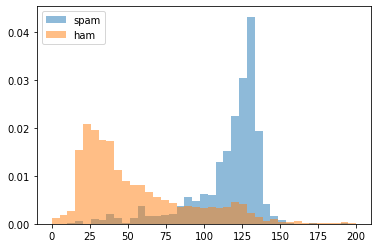

In [31]:
bins = np.linspace(0, 200, 40)
pyplot.hist(data[data['label'] == 'spam']['body_length'], bins, alpha = 0.5, density = True, label = 'spam')
pyplot.hist(data[data['label'] == 'ham']['body_length'], bins, alpha = 0.5, density = True, label = 'ham')
pyplot.legend(loc = 'upper left')
pyplot.show()

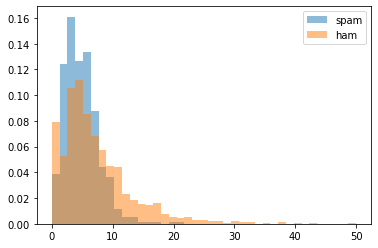

In [32]:
bins = np.linspace(0, 50, 40)
pyplot.hist(data[data['label'] == 'spam']['body_punct%'], bins, alpha = 0.5, density = True, label = 'spam')
pyplot.hist(data[data['label'] == 'ham']['body_punct%'], bins, alpha = 0.5, density = True, label = 'ham')
pyplot.legend(loc = 'upper right')
pyplot.show()

#### 4. feature transformation

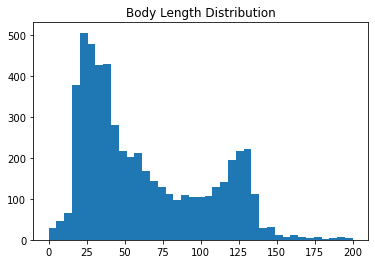

In [33]:
bins = np.linspace(0, 200, 40)
pyplot.hist(data['body_length'], bins)
pyplot.title('Body Length Distribution')
pyplot.show()

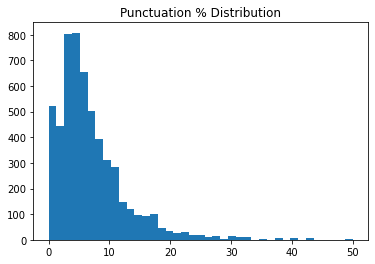

In [34]:
bins = np.linspace(0, 50, 40)
pyplot.hist(data['body_punct%'], bins)
pyplot.title('Punctuation % Distribution')
pyplot.show()

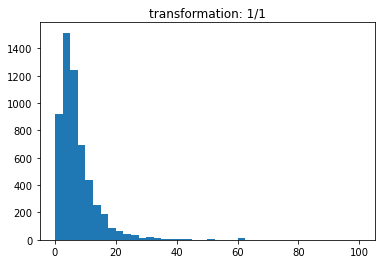

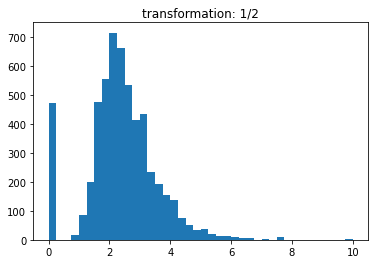

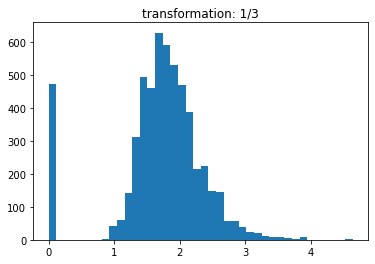

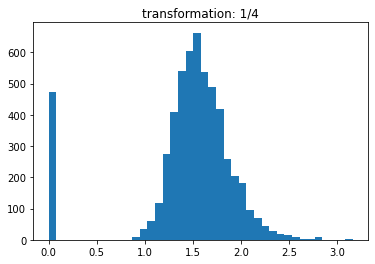

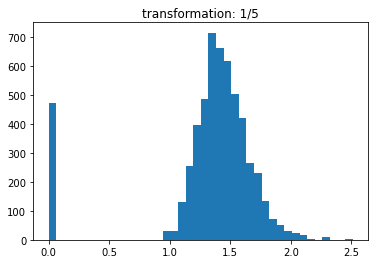

In [35]:
# Box-Cox power transformation
for i in [1, 2, 3, 4, 5]:
    pyplot.hist(data['body_punct%']**(1 / i), bins = 40)
    pyplot.title('transformation: 1/{}'.format(str(i)))
    pyplot.show()

## Machine learning model: Random Forest

In [36]:
X_features = pd.concat([data['body_length'], data['body_punct%'], pd.DataFrame(X_tfidf.toarray())], axis = 1)
X_features.head()

,body_length,body_punct%,0,1,2,3,4,5,6,7,...,8199,8200,8201,8202,8203,8204,8205,8206,8207,8208
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1. Random Forest with cross validation

In [37]:
from sklearn.ensemble import RandomForestClassifier
#print(dir(RandomForestClassifier))
#print(RandomForestClassifier())

from sklearn.model_selection import KFold, cross_val_score

rf = RandomForestClassifier(n_jobs = -1)  # build individual decision trees in parallel 
k_fold = KFold(n_splits = 5)
cross_val_score(rf, X_features, data['label'], cv = k_fold, scoring = 'accuracy', n_jobs = -1)

array([0.97307002, 0.97755835, 0.97396768, 0.96855346, 0.97574124])

#### 2. Ramdom Forest with one holdout test set

In [38]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore', category = FutureWarning) # setting ignore as a parameter and further adding category


x_train, x_test, y_train, y_test = train_test_split(X_features, data['label'], test_size = 0.2)

rf = RandomForestClassifier(n_estimators = 50, max_depth = 20, n_jobs = -1)
rf_model = rf.fit(x_train, y_train)

#### 3. feature importance analysis

In [39]:
sorted(zip(rf_model.feature_importances_, x_train.columns), reverse = True)[0:10]

[(0.04341206608056814, 'body_length'),
 (0.03619684446102005, 1821),
 (0.03383714291920716, 7439),
 (0.029117518130493063, 2050),
 (0.027302839397626625, 3165),
 (0.023251490704831047, 7935),
 (0.018630915680740233, 4851),
 (0.0165101470998115, 7265),
 (0.015119038342007793, 7105),
 (0.014093360785319711, 5793)]

In [40]:
y_pred = rf_model.predict(x_test)

In [41]:
precision, recall, f1score, support = score(y_test, y_pred, pos_label = 'spam', average = 'binary')

print('precision: {} / recall: {} / f1 score: {} / accuracy: {}'.format(round(precision, 3),
                                                                        round(recall, 3),
                                                                        round(f1score, 3),
                                                                        round((y_pred == y_test).sum()/len(y_pred), 3) 
                                                                       )
     
     )

precision: 1.0 / recall: 0.623 / f1 score: 0.768 / accuracy: 0.948


#### 4. Grid search

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X_features, data['label'], test_size = 0.2)

In [43]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators = n_est, max_depth = depth, n_jobs = -1)
    rf_model = rf.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    precision, recall, f1score, support = score(y_test, y_pred, pos_label = 'spam', average = 'binary')

    print('n_estimator: {} / max_depth: {} / precision: {} / recall: {} / f1 score: {} / accuracy: {}'.format(
                                                                        n_est,
                                                                        depth,
                                                                        round(precision, 3),
                                                                        round(recall, 3),
                                                                        round(f1score, 3),
                                                                        round((y_pred == y_test).sum()/len(y_pred), 3)  
                                                                           )
     )
    

In [44]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

n_estimator: 10 / max_depth: 10 / precision: 1.0 / recall: 0.268 / f1 score: 0.422 / accuracy: 0.897
n_estimator: 10 / max_depth: 20 / precision: 1.0 / recall: 0.599 / f1 score: 0.749 / accuracy: 0.943
n_estimator: 10 / max_depth: 30 / precision: 1.0 / recall: 0.752 / f1 score: 0.858 / accuracy: 0.965
n_estimator: 10 / max_depth: None / precision: 1.0 / recall: 0.803 / f1 score: 0.89 / accuracy: 0.972
n_estimator: 50 / max_depth: 10 / precision: 1.0 / recall: 0.274 / f1 score: 0.43 / accuracy: 0.898
n_estimator: 50 / max_depth: 20 / precision: 1.0 / recall: 0.592 / f1 score: 0.744 / accuracy: 0.943
n_estimator: 50 / max_depth: 30 / precision: 1.0 / recall: 0.72 / f1 score: 0.837 / accuracy: 0.961
n_estimator: 50 / max_depth: None / precision: 1.0 / recall: 0.771 / f1 score: 0.871 / accuracy: 0.968
n_estimator: 100 / max_depth: 10 / precision: 1.0 / recall: 0.299 / f1 score: 0.461 / accuracy: 0.901
n_estimator: 100 / max_depth: 20 / precision: 1.0 / recall: 0.631 / f1 score: 0.773 / acc

#### 5. Evaluate Random Forest with GridSearchCV

In [45]:
x_tfidf_feat = pd.concat([data['body_length'], data['body_punct%'], pd.DataFrame(X_tfidf.toarray())], axis = 1)
x_count_feat = pd.concat([data['body_length'], data['body_punct%'], pd.DataFrame(X_counts.toarray())], axis = 1)
x_count_feat.head()

,body_length,body_punct%,0,1,2,3,4,5,6,7,...,8199,8200,8201,8202,8203,8204,8205,8206,8207,8208
0,160,2.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
rf = RandomForestClassifier()
param = {
            'n_estimators': [10, 150, 300],
            'max_depth': [30, 60, 90, None]   
}

gs = GridSearchCV(rf, param, cv = 5, n_jobs = -1)
gs_fit = gs.fit(x_tfidf_feat, data['label'])

pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,41.530033,2.697432,0.256634,0.036736,None,300,"{'max_depth': None, 'n_estimators': 300}",0.975763,0.977558,0.973968,0.971249,0.973046,0.974317,0.002179,1
7,33.933274,0.883422,0.604572,0.050563,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.974865,0.976661,0.972172,0.971249,0.975741,0.974138,0.002082,2
3,4.807253,0.271898,0.315143,0.186690,60,10,"{'max_depth': 60, 'n_estimators': 10}",0.974865,0.973070,0.973070,0.973046,0.973944,0.973599,0.000720,3
4,29.814588,0.297697,0.627452,0.107676,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.976661,0.977558,0.973070,0.968553,0.972147,0.973598,0.003253,4
5,57.139230,0.371716,0.771447,0.131878,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.974865,0.977558,0.971275,0.970350,0.973046,0.973419,0.002584,5


In [48]:
rf = RandomForestClassifier()
param = {
            'n_estimators': [10, 150, 300],
            'max_depth': [30, 60, 90, None]   
}

gs = GridSearchCV(rf, param, cv = 5, n_jobs = -1)
gs_fit = gs.fit(x_count_feat, data['label'])

pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,34.975605,0.221475,0.603141,0.073863,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.976661,0.975763,0.973968,0.969452,0.970350,0.973239,0.002874,1
8,63.971494,0.723071,0.515039,0.049785,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.974865,0.976661,0.973070,0.966757,0.972147,0.972700,0.003351,2
4,30.548720,0.548812,0.603757,0.104198,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.978456,0.973070,0.973968,0.966757,0.971249,0.972700,0.003803,3
11,41.822136,2.209531,0.251650,0.036213,None,300,"{'max_depth': None, 'n_estimators': 300}",0.974865,0.972172,0.973070,0.967655,0.974843,0.972521,0.002645,4
5,58.861220,0.731281,0.719806,0.051127,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.975763,0.972172,0.973070,0.967655,0.973944,0.972521,0.002707,5


## Machine learning model: Gradient boosting with grid search

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X_features, data['label'], test_size = 0.2)

In [59]:
def train_GB(n_est, depth, lr):
    gb = GradientBoostingClassifier(n_estimators = n_est, max_depth = depth, learning_rate = lr)
    gb_model = gb.fit(x_train, y_train)
    y_pred = gb_model.predict(x_test)
    precision, recall, f1score, support = score(y_test, y_pred, pos_label = 'spam', average = 'binary')

    print('n_estimator: {} / max_depth: {} / learning_rate: {} / precision: {} / recall: {} / f1 score: {} / accuracy: {}'.format(
                                                                        n_est,
                                                                        depth,
                                                                        lr,
                                                                        round(precision, 3),
                                                                        round(recall, 3),
                                                                        round(f1score, 3),
                                                                        round((y_pred == y_test).sum()/len(y_pred), 3)  
                                                                           )
     )
    

In [60]:
for n_est in [50, 100, 150]:
    for depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, depth, lr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


n_estimator: 50 / max_depth: 3 / learning_rate: 0.01 / precision: 0.0 / recall: 0.0 / f1 score: 0.0 / accuracy: 0.852
n_estimator: 50 / max_depth: 3 / learning_rate: 0.1 / precision: 0.992 / recall: 0.776 / f1 score: 0.871 / accuracy: 0.966
n_estimator: 50 / max_depth: 3 / learning_rate: 1 / precision: 0.942 / recall: 0.782 / f1 score: 0.854 / accuracy: 0.961


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


n_estimator: 50 / max_depth: 7 / learning_rate: 0.01 / precision: 0.0 / recall: 0.0 / f1 score: 0.0 / accuracy: 0.852
n_estimator: 50 / max_depth: 7 / learning_rate: 0.1 / precision: 0.972 / recall: 0.83 / f1 score: 0.895 / accuracy: 0.971
n_estimator: 50 / max_depth: 7 / learning_rate: 1 / precision: 0.942 / recall: 0.794 / f1 score: 0.862 / accuracy: 0.962


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


n_estimator: 50 / max_depth: 11 / learning_rate: 0.01 / precision: 0.0 / recall: 0.0 / f1 score: 0.0 / accuracy: 0.852
n_estimator: 50 / max_depth: 11 / learning_rate: 0.1 / precision: 0.972 / recall: 0.83 / f1 score: 0.895 / accuracy: 0.971
n_estimator: 50 / max_depth: 11 / learning_rate: 1 / precision: 0.916 / recall: 0.794 / f1 score: 0.851 / accuracy: 0.959
n_estimator: 50 / max_depth: 15 / learning_rate: 0.01 / precision: 1.0 / recall: 0.006 / f1 score: 0.012 / accuracy: 0.853
n_estimator: 50 / max_depth: 15 / learning_rate: 0.1 / precision: 0.966 / recall: 0.848 / f1 score: 0.903 / accuracy: 0.973
n_estimator: 50 / max_depth: 15 / learning_rate: 1 / precision: 0.944 / recall: 0.824 / f1 score: 0.88 / accuracy: 0.967
n_estimator: 100 / max_depth: 3 / learning_rate: 0.01 / precision: 1.0 / recall: 0.564 / f1 score: 0.721 / accuracy: 0.935
n_estimator: 100 / max_depth: 3 / learning_rate: 0.1 / precision: 0.971 / recall: 0.8 / f1 score: 0.877 / accuracy: 0.967
n_estimator: 100 / max_

## Machine learning model: Gradient boosting with GridSearchCV

In [61]:
gb = GradientBoostingClassifier()
param = {
            'n_estimators': [100, 150],
            'max_depth': [7, 11, 15],
            'learning_rate': [0.1]
}

gs = GridSearchCV(gb, param, cv = 5, n_jobs = -1)
cv_fit = gs.fit(x_tfidf_feat, data['label'])

pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,238.317343,1.246532,0.410958,0.049388,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.974865,0.980251,0.973968,0.971249,0.970350,0.974137,0.003482,1
0,159.349557,1.004724,0.305141,0.041443,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.977558,0.979354,0.973070,0.971249,0.968553,0.973957,0.003985,2
5,325.539030,2.167760,0.151147,0.016687,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.976661,0.979354,0.975763,0.967655,0.970350,0.973957,0.004299,3
3,319.978127,11.644437,0.244030,0.030664,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.977558,0.977558,0.972172,0.967655,0.971249,0.973239,0.003836,4
4,254.322759,3.744393,0.211248,0.031008,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.973968,0.976661,0.970377,0.966757,0.973046,0.972162,0.003367,5


In [62]:
gb = GradientBoostingClassifier()
param = {
            'n_estimators': [100, 150],
            'max_depth': [7, 11, 15],
            'learning_rate': [0.1]
}

gs = GridSearchCV(gb, param, cv = 5, n_jobs = -1)
cv_fit = gs.fit(x_count_feat, data['label'])

pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,225.903356,0.722977,0.471821,0.061023,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.973968,0.981149,0.976661,0.969452,0.971249,0.974496,0.004128,1
0,151.456522,0.472049,0.334994,0.054051,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.973070,0.978456,0.973968,0.969452,0.973046,0.973598,0.002881,2
5,320.521033,1.370537,0.147963,0.016487,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.973070,0.980251,0.972172,0.970350,0.971249,0.973419,0.003535,3
4,248.851136,2.217898,0.197563,0.029037,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.973070,0.977558,0.972172,0.972147,0.971249,0.973239,0.002235,4
2,218.541027,0.875952,0.318980,0.025780,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.975763,0.979354,0.973968,0.966757,0.970350,0.973238,0.004351,5


## Model selection

In [63]:
x_train, x_test, y_train, y_test = train_test_split(data[['body_text', 'body_length', 'body_punct%']], 
                                                    data['label'], test_size = 0.2)

In [64]:
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
tfidf_vect_fit = tfidf_vect.fit(x_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(x_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(x_test['body_text'])

x_train_tfidf_vect = pd.concat([x_train[['body_length', 'body_punct%']].reset_index(drop = True),
                               pd.DataFrame(tfidf_train.toarray())], axis= 1

)

x_test_tfidf_vect = pd.concat([x_test[['body_length', 'body_punct%']].reset_index(drop = True),
                               pd.DataFrame(tfidf_test.toarray())], axis = 1

)

x_train_tfidf_vect.head()

,body_length,body_punct%,0,1,2,3,4,5,6,7,...,7206,7207,7208,7209,7210,7211,7212,7213,7214,7215
0,80,3.7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20,5.0,0.284193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37,2.7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,125,10.4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59,5.1,0.179797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
import time

rf = RandomForestClassifier(n_estimators = 150, max_depth = None, n_jobs = -1)

start = time.time()
rf_model = rf.fit(x_train_tfidf_vect, y_train)
end = time.time()
fit_time = end - start

start = time.time()
y_pred = rf_model.predict(x_test_tfidf_vect)
end = time.time()
predict_time = end - start

precision, recall, f1score, support = score(y_test, y_pred, pos_label = 'spam', average = 'binary')

print('precision: {} / recall: {} / f1 score: {} / accuracy: {}'.format(round(precision, 3),
                                                                        round(recall, 3),
                                                                        round(f1score, 3),
                                                                        round((y_pred == y_test).sum()/len(y_pred), 3) 
                                                                       )
     
     )

print('fit time: {} / predict time: {}'.format(round(fit_time, 3), round(predict_time, 3)))

precision: 1.0 / recall: 0.892 / f1 score: 0.943 / accuracy: 0.986
fit time: 1.738 / predict time: 0.122


In [66]:
gb = GradientBoostingClassifier(n_estimators = 150, max_depth = 11, learning_rate = 0.1)

start = time.time()
gb_model = gb.fit(x_train_tfidf_vect, y_train)
end = time.time()
fit_time = end - start

start = time.time()
y_pred = gb_model.predict(x_test_tfidf_vect)
end = time.time()
predict_time = end - start


precision, recall, f1score, support = score(y_test, y_pred, pos_label = 'spam', average = 'binary')

print('precision: {} / recall: {} / f1 score: {} / accuracy: {}'.format(
                                                                        round(precision, 3),
                                                                        round(recall, 3),
                                                                        round(f1score, 3),
                                                                        round((y_pred == y_test).sum()/len(y_pred), 3)  
                                                                           )
     )
print('fit time: {} / predict time: {}'.format(round(fit_time, 3), round(predict_time, 3)))

precision: 0.951 / recall: 0.912 / f1 score: 0.931 / accuracy: 0.982
fit time: 122.409 / predict time: 0.103
